<img src="https://skewthescript.org/s/grad_cap_money.jpg">

## Data Science Project: Use data to determine the best and worst colleges for conquering student debt.

### Notebook 1: Basic R Commands & Data Exploration

Does college pay off? We'll use some of the latest data from the US Department of Education's <a href="https://collegescorecard.ed.gov/data/">College Scorecard Database</a> to answer that question. In this first notebook, you'll get a gentle introduction to R - a coding language used by data scientists to analyze large datasets. Then, you'll begin diving into the college scorecard data yourself. By the end of this notebook, you'll get a general sense of which colleges set up their graduates for success and which colleges ... don't.

In [1]:
## Run this code but do not edit it. Hit Ctrl+Enter to run the code
# This command downloads a useful package of R commands
library(coursekata)

── CourseKata packages ──────────────────────────────────── coursekata 0.18.0 ──
✔ dslabs              0.7.6         ✔ Metrics             0.1.4  
✔ Lock5withR          1.2.2         ✔ lsr                 0.5.2  
✔ fivethirtyeightdata 0.1.0         ✔ mosaic              1.8.4.2
✔ fivethirtyeight     0.6.2         ✔ supernova           2.5.7  


### 1.0 - Exploring the dataset

To begin, let's download our data. Our full dataset is included in a file named `colleges.csv`, which we're retrieving from the `skewthescript.org` website. The command below downloads the data from the file and stores it into an R dataframe object called `dat`.

In [3]:
## Run this code but do not edit it. Hit Ctrl+Enter to run the code
# This command downloads data and stores it in the object `dat`
dat <- read.csv('https://skewthescript.org/s/colleges.csv')

The `<-` operator is used to store values. For example, `x<-10` stores the value of 10 in `x`, meaning the value 10 is saved in the object `x`.

To get a quick view of the dataframe (`dat`), we can use the `head` command to print out its first several rows.

In [4]:
## Run this code but do not edit it. Hit Ctrl+Enter to run the code
# This command prints out the first several rows of the dataset
head(dat)

,OPEID,name,city,state,region,median_debt,default_rate,highest_degree,ownership,locale,⋯,avg_cost,net_tuition,ed_spending_per_student,avg_faculty_salary,pct_PELL,pct_fed_loan,grad_rate,pct_firstgen,med_fam_income,med_alum_earnings
,<int>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,100200,Alabama A & M University,Normal,AL,South,15.250,12.1,Graduate,Public,Small City,⋯,23.445,8.101,4.836,7.599,70.95,75.04,28.66,36.58281,23.5530,36.339
2,105200,University of Alabama at Birmingham,Birmingham,AL,South,15.085,4.8,Graduate,Public,Small City,⋯,25.542,11.986,14.691,11.380,33.97,46.88,61.17,34.12237,34.4890,46.990
3,2503400,Amridge University,Montgomery,AL,South,10.984,12.9,Graduate,Private nonprofit,Small City,⋯,20.100,13.890,3.664,4.545,74.52,84.93,25.00,51.25000,15.0335,37.895
4,105500,University of Alabama in Huntsville,Huntsville,AL,South,14.000,4.7,Graduate,Public,Small City,⋯,24.861,8.279,8.320,9.697,24.03,38.55,57.14,31.01322,44.7870,54.361
5,100500,Alabama State University,Montgomery,AL,South,17.500,12.8,Graduate,Public,Small City,⋯,21.892,9.302,9.579,7.194,73.68,78.05,31.77,34.34343,22.0805,32.084
6,105100,The University of Alabama,Tuscaloosa,AL,South,17.671,4.0,Graduate,Public,Small City,⋯,30.016,14.705,9.650,10.349,17.18,36.44,72.14,22.57127,66.7335,52.751


The vertical columns of the dataframe are called `variables`, and their elements are called `values`. For example, the variable `city` has values `Normal`, `Birmingham`, `Montgomery`, `Huntsville`, etc. 

The horizontal rows of the dataframe are called `observations`. For example, the first observation is `Alabama A & M University`, which is located in `AL` (Alabama), in the city of `Normal`, and has a median student debt of `$15,250`. For this dataframe, each observation describes a specific college.

<div class="alert alert-block alert-warning">

**1.1 -** Of the variables displayed, identify one that is quantitative, one that is categorical, and one that is a unique identifier.

</div>

**Double-click to type a response:**


Median debt is quantitative. Region is categorical. OPEID is identifier



The `head` command only displays several rows of the dataframe. To see the full dimensions of the dataframe, we can use the `dim` command.

<div class="alert alert-block alert-warning"> 

**1.2 -** Use the `dim` command on `dat` to display the dimensions of the dataframe.

</div>

In [5]:
# Your code goes here
dim(dat)


[1] 4435   26

<div class="alert alert-block alert-info">

**Check yourself:** Your code should have printed out two numbers: 4435 and 26.</div>

The first number outputted by `dim` is the number of horizontal rows in the dataframe. This represents the number of observations (number of colleges). The second number is the number of vertical columns in the dataframe. This represents the number of variables. What are all these variables? See the description of the dataset below, along with links to descriptions of all the variables.

<div class="alert alert-block alert-success">

### The Dataset

**General description** - The US Department of Education's <a href="https://collegescorecard.ed.gov/data/">College Scorecard Database</a> shows various metrics of cost, enrollment, size, student debt, student demographics, and alumni success. It describes almost every University, college, community college, trade school, and certificate program in the United States. The data is current as of the 2020-2021 school year.

**Description of all variables:** See <a href="https://docs.google.com/document/d/1C3eR6jZQ2HNbB5QkHaPsBfOcROZRcZ0FtzZZiyyS9sQ/edit">here</a>

**Detailed data file description:** See <a href="https://docs.google.com/spreadsheets/d/1fa_Bd3_eYEmxvKPcu3hK2Dgazdk-9bkeJwONMS6u43Q/edit?usp=sharing">here</a></div>

With such a large dataset, to make your life easier, you may want to work with only a few variables at a time. In the following code, we use the `select` command to select only the variables `name`, `median_debt`, `ownership`, `admit_rate`, and `hbcu` and save them in a new dataframe called `example_dat`.

In [6]:
## Run this code but do not edit it
# Select certain columns from dat, store into example_dat
example_dat <- select(dat, name, median_debt, ownership, admit_rate, hbcu)

# Display head of example_dat
head(example_dat)

,name,median_debt,ownership,admit_rate,hbcu
,<chr>,<dbl>,<chr>,<dbl>,<chr>
1,Alabama A & M University,15.250,Public,89.65,Yes
2,University of Alabama at Birmingham,15.085,Public,80.60,No
3,Amridge University,10.984,Private nonprofit,NA,No
4,University of Alabama in Huntsville,14.000,Public,77.11,No
5,Alabama State University,17.500,Public,98.88,Yes
6,The University of Alabama,17.671,Public,80.39,No


<div class="alert alert-block alert-warning"> 

**1.3 -** Use the `select` command to select the variables `name`, `region`, `default_rate`, `ownership`, and `pct_PELL` from `dat`. Store your new dataframe in an object called `my_dat` and display its head.

</div>

In [7]:
# Your code goes here
my_dat <- select(dat, name, region, default_rate, ownership, pct_PELL)
head(my_dat)

,name,region,default_rate,ownership,pct_PELL
,<chr>,<chr>,<dbl>,<chr>,<dbl>
1,Alabama A & M University,South,12.1,Public,70.95
2,University of Alabama at Birmingham,South,4.8,Public,33.97
3,Amridge University,South,12.9,Private nonprofit,74.52
4,University of Alabama in Huntsville,South,4.7,Public,24.03
5,Alabama State University,South,12.8,Public,73.68
6,The University of Alabama,South,4.0,Public,17.18


In addition to filtering out columns (variables), we can also filter out rows (observations). For example, if I only wanted to analyze colleges that are HBCUs and that have an admissions rate below than 40%, I can use the `subset` command on `example_dat` like this:

In [8]:
## Run this code but do not edit it
# Subset example_dat to only HBCUs with admissions rates lower than 40%
subset(example_dat, hbcu == "Yes" & admit_rate < 40)

,name,median_debt,ownership,admit_rate,hbcu
,<chr>,<dbl>,<chr>,<dbl>,<chr>
461,Delaware State University,18.264,Public,39.34,Yes
473,Howard University,19.500,Private nonprofit,38.64,Yes
491,Florida Agricultural and Mechanical University,18.750,Public,32.98,Yes
503,Florida Memorial University,17.155,Private nonprofit,38.41,Yes
1376,Alcorn State University,16.895,Public,37.72,Yes
1401,Rust College,11.226,Private nonprofit,29.47,Yes
2747,Hampton University,18.500,Private nonprofit,36.00,Yes


A total of 7 colleges fit these conditions.

Note that R has different conventions for comparative statements. For example...
- `==` means `equals exactly`
- `!=` means `does not equal`
- `<` means `less than`
- `>` means `greater than`
- `<=` means `less than or equal to`
- `>=` means `greater than or equal to`

Here are some other common conditional symbols
- `|` means `or`
- `&` means `and`

<div class="alert alert-block alert-warning"> 

**1.4 -** Use the `subset` command to find the colleges in `my_dat` that are located in the `Midwest` region of the United States and have more than a third of their students (greater than 33%) default on their loans.

</div>

In [35]:
# Your code goes here
midwest_defaults <- subset(my_dat, region == "Midwest" & default_rate > 33)
midwest_defaults

,name,region,default_rate,ownership,pct_PELL
,<chr>,<chr>,<dbl>,<chr>,<dbl>
815,West Michigan College of Barbering and Beauty,Midwest,34.4,Private for-profit,42.47
4382,Kenny's Academy of Barbering,Midwest,44.4,Private for-profit,72.33


<div class="alert alert-block alert-info">

**Check yourself:** You should find that 2 schools match your selection criteria.</div>

<div class="alert alert-block alert-warning"> 

**1.5 -** What do you notice about the observations that fit your selection criteria? What do you wonder?

</div>

**Double-click to type a response:** 
The top two of  them are private for-profit (trade schools). I wonder if its because tuition for private schools are more expensive than public schools.

Suppose you're interested in a particular college, such as Howard University. We can use the `subset` command to filter the `example_dat` dataframe and focus solely on the information pertaining to that college.

In [13]:
## Run this code but do not edit it
# Subset example_dat to only show Howard University
subset(example_dat, name == "Howard University")

,name,median_debt,ownership,admit_rate,hbcu
,<chr>,<dbl>,<chr>,<dbl>,<chr>
473,Howard University,19.5,Private nonprofit,38.64,Yes


<div class="alert alert-block alert-warning"> 

**1.6 -** Select a college that interests you. Then use the `subset` command to locate and extract information about the college from `my_dat`. **Note:** The exact spelling of the names of all the colleges in the dataset can be found <a href="https://docs.google.com/spreadsheets/d/1gdLqIbMl2zF1JrCGvGB6Z3XCFR_368dd2S97Hja-E60/edit?usp=sharing">here</a>.


</div>

In [18]:
# Your code goes here
subset(my_dat, name == "Massachusetts Institute of Technology")



,name,region,default_rate,ownership,pct_PELL
,<chr>,<chr>,<dbl>,<chr>,<dbl>
1178,Massachusetts Institute of Technology,Northeast,0.3,Private nonprofit,18.96


One further way to explore a dataset is to reorder its observations. For example, we can use the `arrange` command to order the colleges in `example_dat` by their admission rate:

In [19]:
## Run this code but do not edit it
# Arrange data in order of their admission rates
arrange(example_dat, admit_rate)

name,median_debt,ownership,admit_rate,hbcu
<chr>,<dbl>,<chr>,<dbl>,<chr>
Curtis Institute of Music,16.250,Private nonprofit,2.44,No
Harvard University,12.072,Private nonprofit,5.01,No
Stanford University,11.000,Private nonprofit,5.19,No
Princeton University,10.355,Private nonprofit,5.63,No
Yale University,12.000,Private nonprofit,6.53,No
Columbia University in the City of New York,19.250,Private nonprofit,6.66,No
California Institute of Technology,9.867,Private nonprofit,6.69,No
Massachusetts Institute of Technology,12.000,Private nonprofit,7.26,No
University of Chicago,13.000,Private nonprofit,7.31,No


As we can see, the most selective schools now top the list. You'll see some `NA` values from `admit_rate` at the bottom of the arranged dataset. These are missing values, which we'll discuss later.

To arrange the data in descending order of admission rates (highest admission rates on top), we can use the `desc` argument within our `arrange` command:

In [20]:
## Run this code but do not edit it
# Arrange data in descending order of their admission rates
arrange(example_dat, desc(admit_rate))

name,median_debt,ownership,admit_rate,hbcu
<chr>,<dbl>,<chr>,<dbl>,<chr>
University of Arkansas Community College-Morrilton,6.250,Public,100,No
Design Institute of San Diego,31.000,Private for-profit,100,No
Naropa University,16.390,Private nonprofit,100,No
VanderCook College of Music,27.000,Private nonprofit,100,No
Saint Elizabeth School of Nursing,20.291,Private nonprofit,100,No
Maharishi International University,13.085,Private nonprofit,100,No
Grace Christian University,9.708,Private nonprofit,100,No
Sacred Heart Major Seminary,7.343,Private nonprofit,100,No
JFK Muhlenberg Harold B. and Dorothy A. Snyder Schools,15.750,Private nonprofit,100,No


<div class="alert alert-block alert-warning"> 

**1.7 -** Use the `arrange` command to organize the colleges in `my_dat` such that the colleges with the highest student loan default rates are at the top.

</div>

In [21]:
# Your code goes here
arrange(my_dat, desc(default_rate))


name,region,default_rate,ownership,pct_PELL
<chr>,<chr>,<dbl>,<chr>,<dbl>
Tomorrow's Image Barber And Beauty Academy of Virginia,South,57.1,Private for-profit,88.89
Bull City Durham Beauty and Barber College,South,57.1,Private for-profit,53.33
No Grease Barber School,South,57.1,Private for-profit,94.12
Barber Institute of Texas,Rockies & Southwest,56.4,Private for-profit,100.00
Natural Images Beauty College,Rockies & Southwest,53.1,Private for-profit,56.79
Nuvani Institute,Rockies & Southwest,51.6,Private for-profit,96.55
B-Unique Beauty and Barber Academy,South,48.4,Private for-profit,62.50
Kenny's Academy of Barbering,Midwest,44.4,Private for-profit,72.33
Louisiana Academy of Beauty,South,43.7,Private for-profit,15.00


ERROR: Error in parse(text = x, srcfile = src): <text>:1:6: unexpected symbol
1:  pip install
         ^


<div class="alert alert-block alert-warning"> 

**1.8 -** What patterns do you notice among the programs that have the highest student loan default rates? What do you wonder?

</div>

**Double-click to type a response:**


They are trade schools. It makes me wonder whether trade schools are expensive or people who attend can't afford trade schools.

<div class="alert alert-block alert-success">

**Reference Guide for R (student resource) -** Now that you've seen a number of different commands in R, check out our <a href = "https://docs.google.com/document/d/1dXT3NO4QjtbIrq29fH6pXHKgt7odZN7BIeU_TBoia4I/edit?usp=sharing">reference guide</a> for a full listing of useful R commands for this project. 

<div>

### 2.0 - Finding summary statistics

When analyzing variables of interest, it's often helpful to calculate summary statistics. For quantitative variables, we can use the `summary` command to find the five-number summary (minimum, Q1, median, Q3, maximum) and the average (mean) of the values. The code block shows how we find these summary statistics for the `admit_rate` variable. 

**Note:** The `$` sign in R is used to isolate a single variable (`admit_rate`) from a full dataframe (`dat`).

In [22]:
## Run this code but do not edit it
# Find summary statistics for admit_rate
summary(dat$admit_rate)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   2.44   59.79   74.68   70.81   86.11  100.00    2731 

A few interesting facts about `admit_rate` that are revealed by this summary:
- As expected, no schools have a 0% admissions rate (the minimum admissions rate is 2.4%). 
- The maximum admissions rate was 100%. So, there's at least one school that admits every applicant.
- The first quartile (Q1) is a 59.79% admissions rate. This means **only 25% of schools** have admissions rates lower than 59.79%. 
- For 2,731 schools, we have missing data. R uses the sybmol `NA` to represent missing values. If we use `admit_rate` in future analyses, we should pay attention to which schools have missing data and, ideally, investigate why their data is missing.

<div class="alert alert-block alert-warning"> 

**2.1 -** Use the `summary` command to get summary statistics for the `default_rate` variable in the `dat` dataframe.

</div>

In [23]:
# Your code goes here



summary(dat$default_rate)



   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.00    4.40    8.20    9.06   12.30   57.10 

<div class="alert alert-block alert-info">

**Check yourself:** The median should be 8.20</div>

<div class="alert alert-block alert-warning"> 

**2.2 -** Comment on what these summary statistics reveal about the `default_rate` values in our dataset.

</div>

**Double-click to type a response:**


At least one institution has a default rate of 0%, indicating that no students defaulted on their loans at that school. 25% of institutions have a default rate less than or equal to 4.4%. These represent schools with relatively low default rates. The average default rate is 9.06%, slightly higher than the median. This suggests the presence of some higher default rate values pulling the mean upward. 75% of institutions have default rates less than or equal to 12.3%. Conversely, 25% have rates higher than this. The highest default rate is 57.1%, which is extremely high and indicates the presence of severe outliers or problematic institutions in terms of student loan repayment.




For categorical data, it doesn't make sense to find means and medians. Instead, it's helpful to look at value counts and proportions. We can use the `table` command to find the counts of the different values for `highest_degree`:

In [24]:
## Run this code but do not edit it
# Find counts of values for highest_degree, store in object 'degree_counts'
degree_counts <- table(dat$highest_degree)

# Print table stored in 'degree_counts'
degree_counts


 Associates   Bachelors Certificate    Graduate 
       1096         501        1374        1464 

1464 of the institutions in our dataset are Universities that offer graduate degrees. On the other end of the spectrum, 1374 of the institutions aren't Universities at all. Rather, they are career-oriented programs that offer trade certificates. 

To get a better sense of scale, we can turn these raw counts into proportions by dividing them by the total:

In [25]:
## Run this code but do not edit it
# Sum all counts in table, store in object 'total'
total <- sum(degree_counts)

# Print the value stored in 'total'
total

[1] 4435

In [26]:
## Run this code but do not edit it
# Divide the table by the total to get proportions
degree_counts / total


 Associates   Bachelors Certificate    Graduate 
  0.2471251   0.1129651   0.3098083   0.3301015 

As you can see, you can use R just like a calculator. Addition, subtraction, multiplication, division ... it's all there. Universities offering graduate degrees make up about 33% of the institutions in our dataset. These are about three times more prevalent than 4-year colleges (Bachelors) that don't offer graduate degrees. 

<div class="alert alert-block alert-warning"> 

**2.3 -** Use the `table` command to get the value counts for the `ownership` variable.

</div>

In [27]:
# Your code goes here
table(dat$ownership)




Private for-profit  Private nonprofit             Public 
              1684               1212               1539 

<div class="alert alert-block alert-info">

**Check yourself:** There are 1539 public schools in the dataset</div>

<div class="alert alert-block alert-warning"> 

**2.4 -** Find the proportion of all institutions that are public, private nonprofit, and private for-profit.

</div>

In [28]:
# Your code goes here

ownership_counts <- table(dat$ownership)
ownership_counts / sum(ownership_counts)




Private for-profit  Private nonprofit             Public 
         0.3797069          0.2732807          0.3470124 

<div class="alert alert-block alert-info">

**Check yourself:** About 34.7% of the schools in the dataset are public schools</div>

### 3.0 - Visualizing data (histograms, barplots, and boxplots)

In addition to summary statistics, a great way to get an overall impression of our data is to visualize it. In this section, we'll walk through different types of visualizations we can create in R. Note: We're saving scatterplots for the next notebook in our series.

One of the most useful visualizations for displaying a quantitative variable is a histogram. Here, we use the `gf_histogram` command to display the histogram for `admit_rate`.

Warning message:
“Removed 2731 rows containing non-finite outside the scale range (`stat_bin()`).”


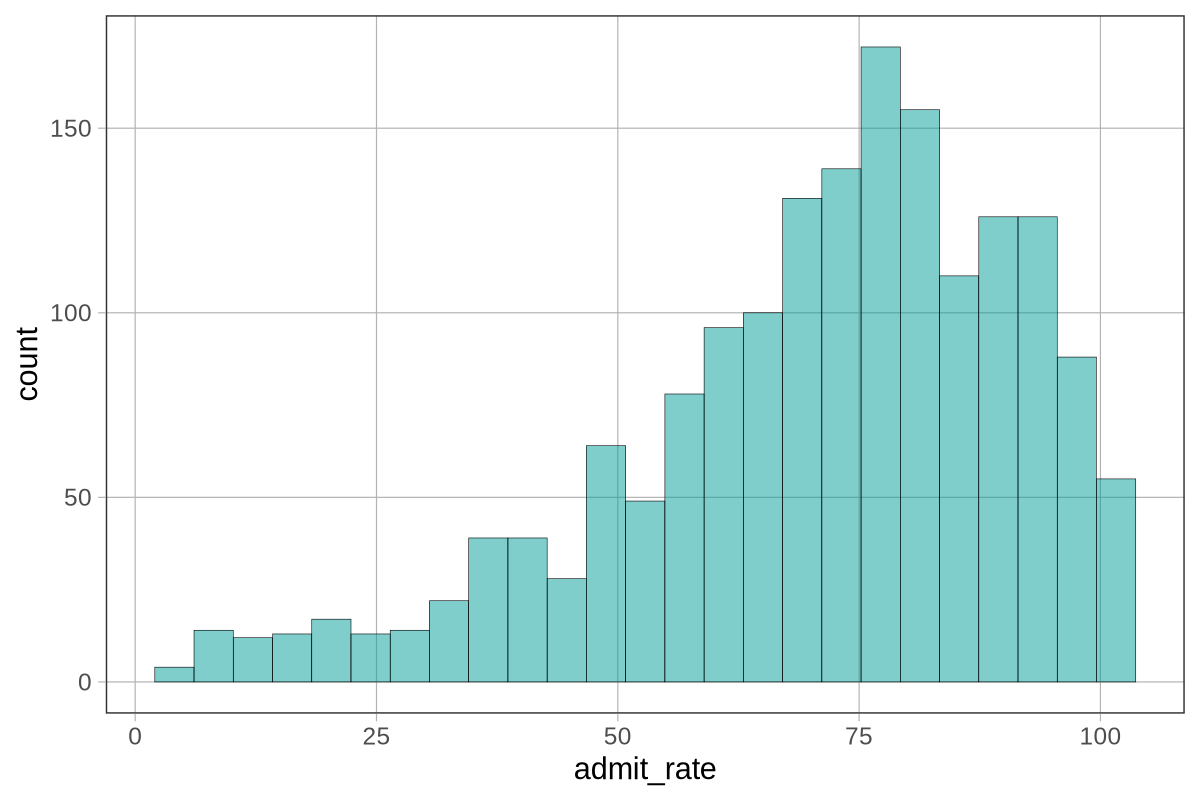

In [29]:
## Run this code but do not edit it
# Create histogram for admit_rate
gf_histogram(~admit_rate, data = dat)

**Note:** A warning message was displayed about removing rows. This is R telling us that it's choosing not to visualize the missing data values (`NA`) that we discovered for `admit_rate` earlier in the notebook.

As we suspected from the summary statistics, it appears that most programs have admissions rates well above 50%, and only a small subset of programs have highly selective admissions rates. In statistics, we call this distribution **left skew**, since there's a tail on the left side. So, institutions with low values (low admissions rates) are relatively unusual compared to most of the other institutions in our dataset.

<div class="alert alert-block alert-warning"> 

**3.1 -** Create a histogram to visualize all the `default_rate` values in the `dat` dataframe.

</div>

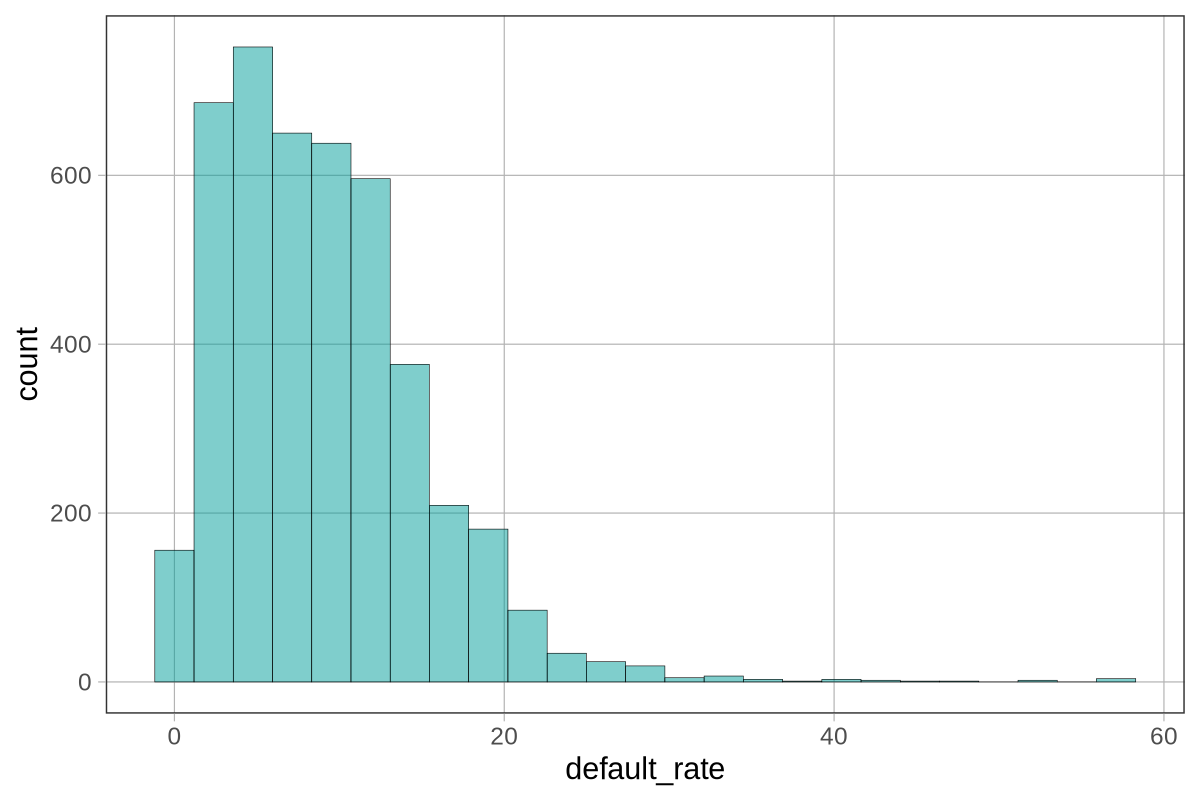

In [30]:
# Your code goes here

gf_histogram(~default_rate, data = dat)


<div class="alert alert-block alert-warning"> 

**3.2 -** Describe the distribution and note any features of interest.

</div>

**Double-click to type a response:**

The distribution is right-skewed, with most schools having default rates below 20%, but a few having extremely high values over 40%. This indicates some institutions may not be setting students up well to repay loans.



To visualize categorical variables, we can use the `gf_bar` command to make bar plots. Here we create a bar plot for `highest_degree`:

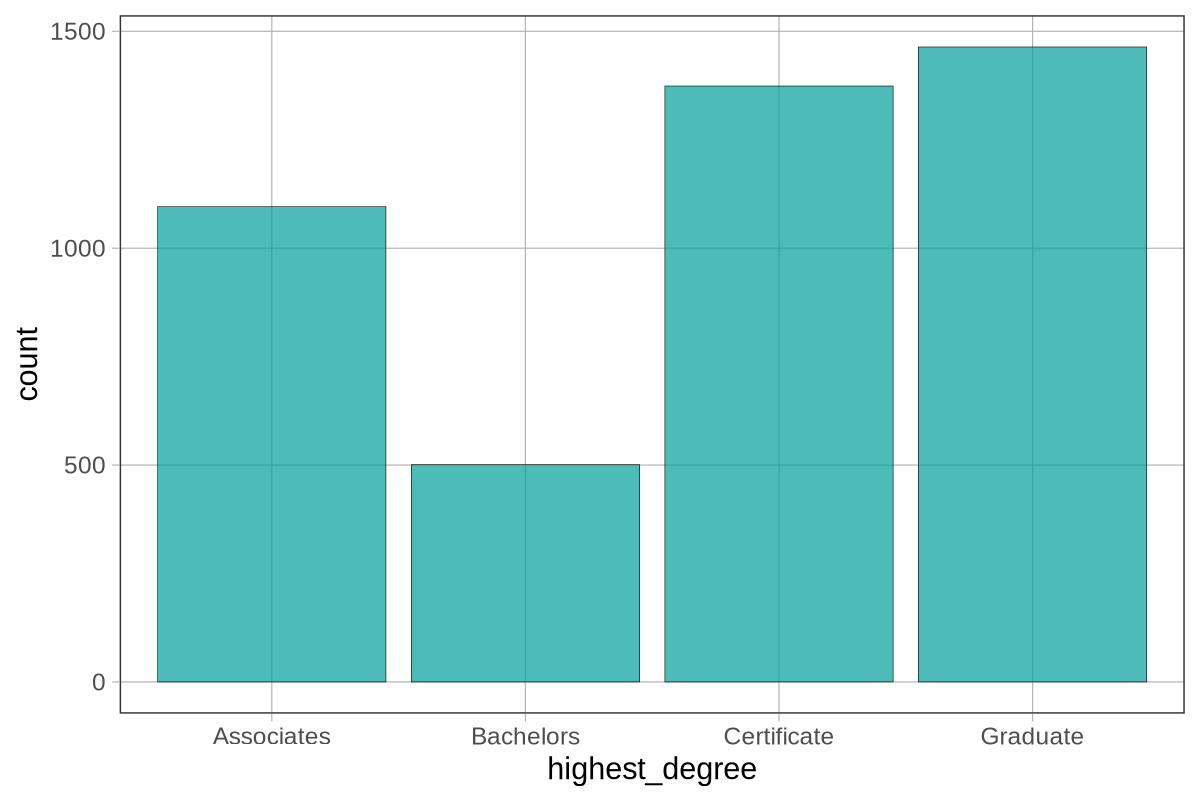

In [31]:
## Run this code but do not edit it
# Create bar plot for highest_degree
gf_bar(~highest_degree, data = dat)

As shown here, most of the institutions in our dataset are Universities that graduate degrees or trade programs that offer professional certificates. There are about 500 colleges that only offer bachelors degrees (without offering graduate degrees).

<div class="alert alert-block alert-warning"> 

**3.3 -** Create a bar plot to visualize the `ownership` values from the `dat` dataframe.

</div>

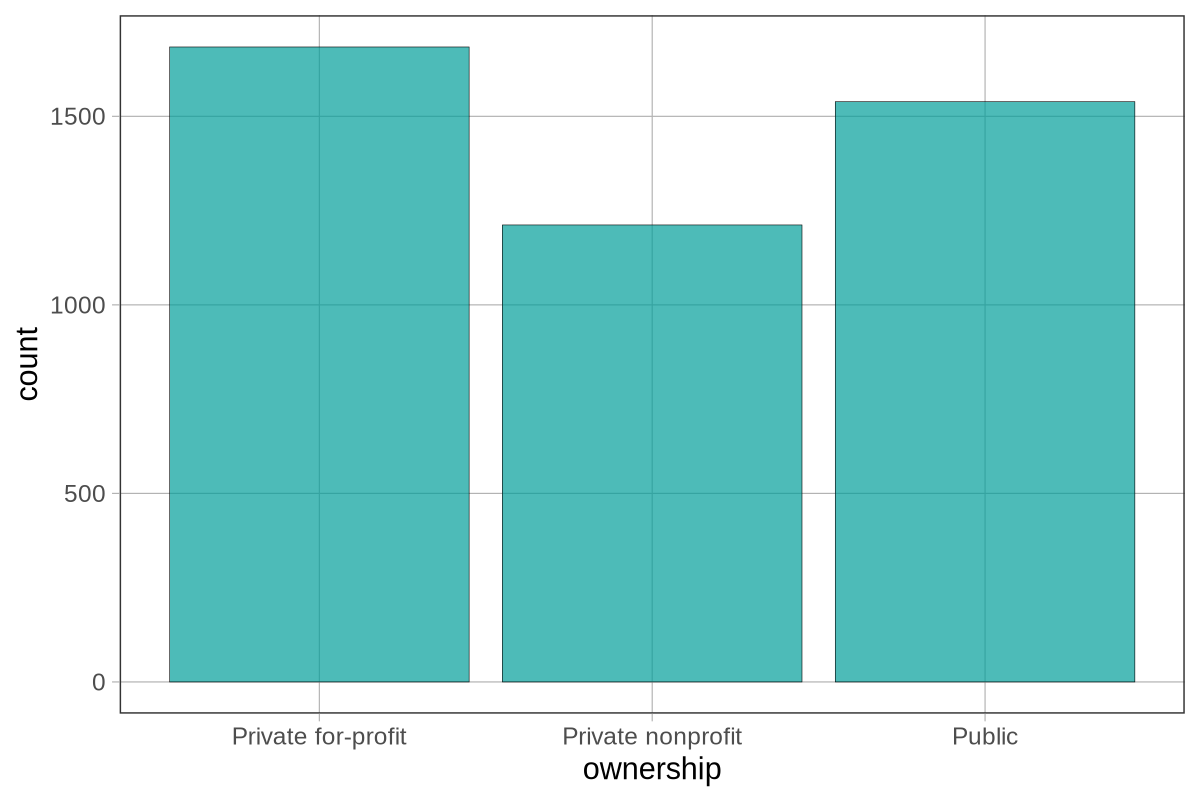

In [32]:
# Your code goes here
gf_bar(~ownership, data = dat)


<div class="alert alert-block alert-warning"> 

**3.4 -** Describe the distribution and note any features of interest.

</div>

**Double-click to type a response:** 

The distribution is bimodal. Public institutions have the highest count, with around 1,750. Private for-profit institutions come next, with about 1,600. Private nonprofit institutions have the lowest count, approximately 1,250.



Sometimes, we may want to explore the relationship between two variables by visualizing them both at once. When we want to visualize the relationship between a categorical variable and quantitative variable, we can use boxplots. Here, we show how to use `gf_boxplot` to visualize the relationship between `highest_degree` (categorical) and `admit_rate` (quantitative).

Warning message:
“Removed 2731 rows containing non-finite outside the scale range
(`stat_boxplot()`).”


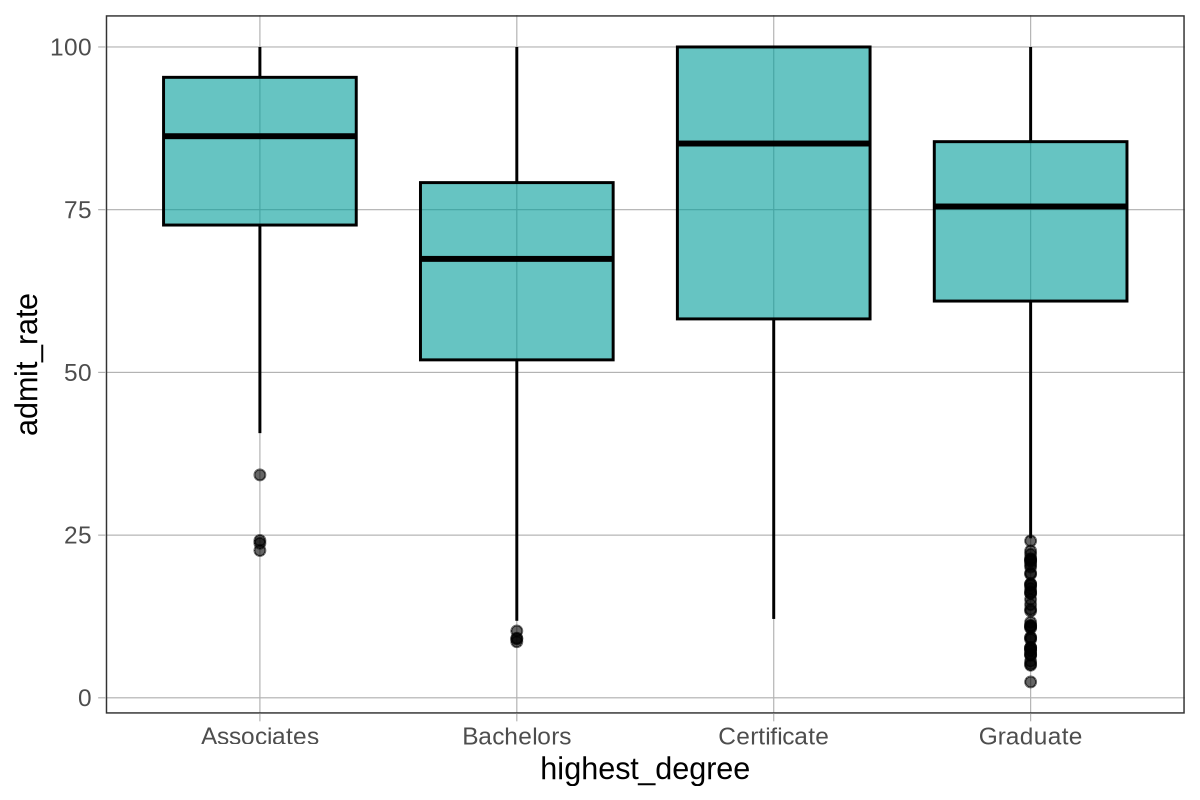

In [33]:
## Run this code but do not edit it
# Create boxplots for admit_rates of institutions with different highest_degree values
gf_boxplot(admit_rate ~ highest_degree, data = dat)

In this case, we're using `highest_degree` as the **predictor variable** and `admit_rate` as the **outcome variable**. In other words, we can use the degree level of an institution (certificate, associates, bachelors, etc.) to help predict its admission rate. That's because certain levels of institutions typically have lower admissions rates than others. So, knowing the level of an institution can help us better predict its admissions rate. 

**Note:** This predictor-outcome relationship is coded in R through the syntax `outcome ~ predictor`, as in `gf_boxplot(admit_rate ~ highest_degree,...)`.

We see that admission rates tend to be lower (lower medians) for colleges / Universities that grant bachelors and graduate degrees. However, it's worth noting that for every institution-type, the first quartile is higher than a 50% admissions rate. So, most programs admit more than half their applicants, regardless of insitution-type. Indeed, we see that the most prestigious Universities with admissions rates lower than 25% are outliers (visualized as dots on the boxplot) among other Universities that offer graduate degrees.

<div class="alert alert-block alert-warning"> 

**3.5 -** Create boxplots to visualize the relationship between `ownership` and `default_rate` from the `dat` dataframe.

</div>

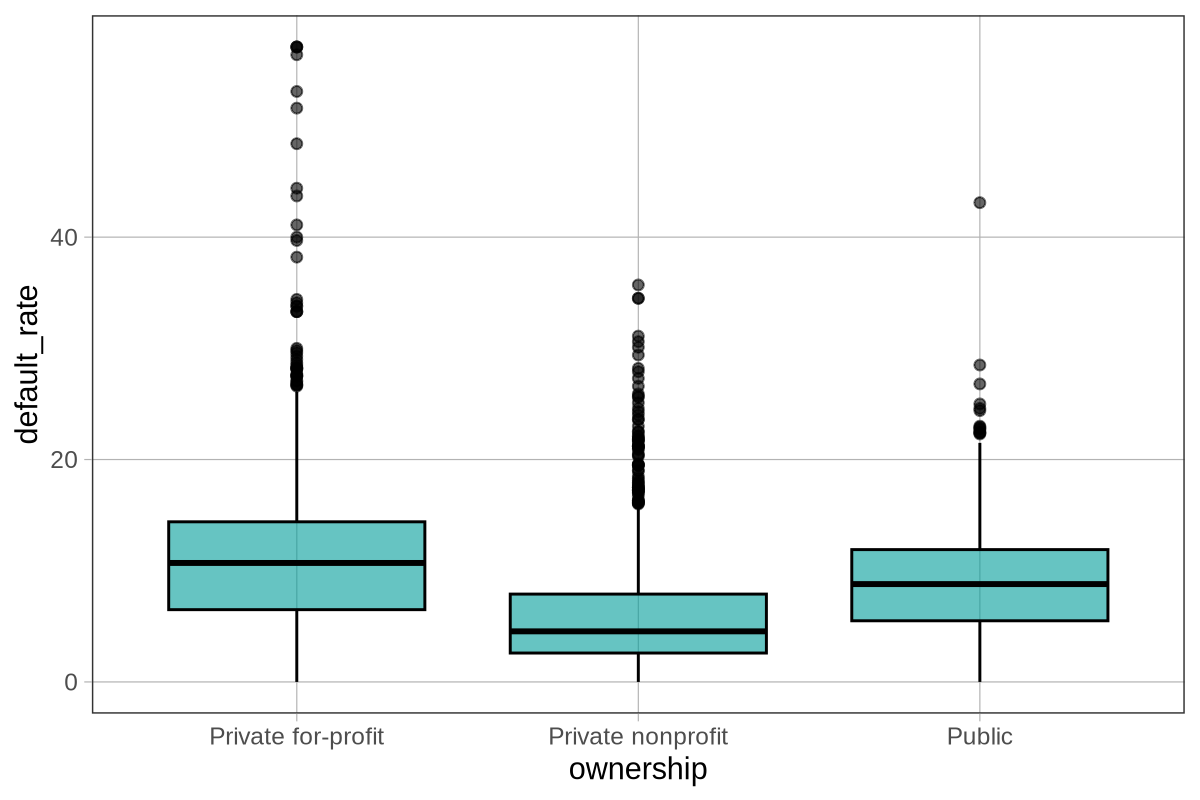

In [34]:
# Your code goes here

gf_boxplot(default_rate ~ ownership, data = dat)



<div class="alert alert-block alert-warning"> 

**3.6 -** Using your boxplot visualization, describe the relationship between institution ownership and studen loan default rates.

</div>

**Double-click to type a response:**


The relationship between institution ownership and student loan default rates reveals significant differences across ownership types. Private for-profit institutions have the highest default rates overall, with a median around 12–13% and a wide spread of values, including many outliers exceeding 30% and some approaching 50%. This suggests that students attending for-profit colleges are more likely to struggle with loan repayment. In contrast, private nonprofit institutions exhibit the lowest default rates, with a median around 5% and a tighter interquartile range, indicating more consistent and favorable student outcomes. Public institutions fall in between the two, with a median default rate around 8–9%. While public colleges show some variability and a few high outliers, their rates are generally lower than for-profits and higher than nonprofits. Overall, the data suggest that students attending private nonprofit institutions tend to have better loan repayment outcomes compared to those at for-profit or public schools.


<div class="alert alert-block alert-success">


### Summer Opportunity: Do you want to learn more about Data Science & AI?
Join our Data Science & AI Summer Bootcamp, where you'll take your learning from this project to the next level. **No prior coding or statistics experience required!** Designed by Harvard grads, the bootcamp allows students from all experience levels to dive deeper into data science concepts, from the basics (e.g. linear regression) to the advanced (e.g. AI neural networks). Students learn in a supportive and collaborative environment, and they walk away with their own real-world project that can be shared on college and internship applications.

📢 Scholarships are available! We’re committed to making this opportunity accessible to all students.

📝 Applications are considered on a rolling basis. Final application deadline: **May 30, 2025**

🔗 Learn more and apply here: https://skewthescript.org/bootcamps
</div>